In [38]:
import sys

import numpy as np

import matplotlib.pyplot as plt

if "/home/axel/Studier/bdg_formalism/BdG-numerical/methods" not in sys.path:
    sys.path.append("/home/axel/Studier/bdg_formalism/BdG-numerical/methods")
    
from bdg_method import BdG_method
from modified_bdg_method import MBdG_method

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
N = 20
Nc = 2
t = 1
mu =0.5 * t
T = 0.2

num_iter = 100
solver = MBdG_method(N, Nc, mu, t, T, num_iter)

solver.run_solver()
print("done.")

done.


In [46]:
a, b = solver.construct_cluster_matrix(0)

T = 0.0: 0.26842253357172013
T = 0.09: 0.2646708726882935
T = 0.18: 0.10996198579668999
T = 0.27: 4.6438004209303635e-17


KeyboardInterrupt: 

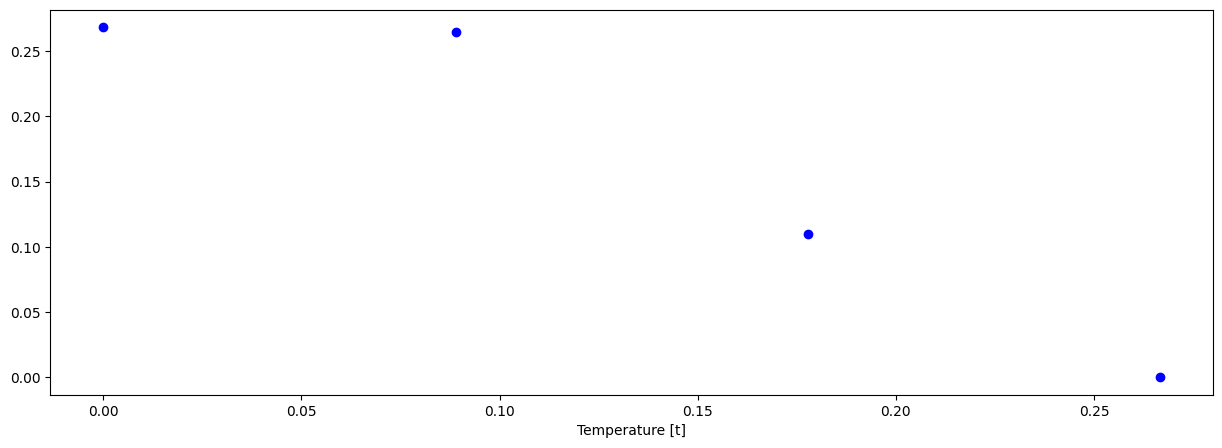

In [65]:
# Calculating the gap parameter amplitude
N = 20
Nc = 2
t = 1
mu = 0.5 * t


num_iter = 100

T_set = np.linspace(0, 0.8*t, 10)

fig, axs = plt.subplots(1, 1, figsize=(15,5))
last_delta = np.zeros((N,N))

# Creating a BdG instance
for i, T in enumerate(T_set):
    if not np.any(last_delta):
        solver = MBdG_method(N, Nc, mu, t, T, num_iter)
    else:
        solver = MBdG_method(N, Nc, mu, t, T, num_iter, delta=last_delta)
    last_delta = solver.run_solver()
    delta_diag = np.diagonal(solver.delta)
    print("T = {0}: {1}".format(round(T, 2), np.mean(np.real(delta_diag))))
    axs.scatter(T, np.mean(np.real(delta_diag)), c="b")    
    axs.set_xlabel("Temperature [t]")
